# Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import skmultilearn

import scipy
from scipy.io import arff

from IPython.display import Image
from prettytable import PrettyTable


from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import hamming_loss
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm


import matplotlib.pyplot as plt
from termcolor import colored
from matplotlib import colors 
import seaborn as sns
import random

import time

# Macro precision and therefore F1 are ill-defined
#This warning means that precision, and consequently f1 score, are undefined for some samples whose tp + fp is zero which results in 0 / 0 when calculating precision for that sample. Because f1 score is a function of precision, it is also undefined and both are set to 0.0 by the library.
#One way to resolve it
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

from scipy import interp
from scipy.sparse import csr_matrix

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.ensemble import RakelD

# Import datasets

In [2]:
def isThereNullVal(data):
    a=[]
    nulls=data.isnull().sum()
    for i in range(len(nulls)):
            if nulls[i]>0:
                a.append(nulls[i])
                print (nulls.index[i],nulls[i])
    print('Conclusion: There are ',len(a),' NULL values')

In [3]:
def isThereTypeObject(data):
    x=data.select_dtypes(include=['object']).columns
    if len(x)==0:
        print('Conclusion: There are ',len(x),' columns type object')
        return
    print(x)
    print('Conclusion: There are ',len(x),' columns type object')

### Student performance dataset

In [4]:
student_mat=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-mat.csv',sep=';')
student_por=pd.read_csv('C:\\Users\\Dusica\\Downloads\\student\\student-por.csv',sep=';')

In [5]:
student = pd.merge(student_mat,student_por, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

### Yeast dataset

In [6]:
yeast, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast.arff')
yeast = pd.DataFrame(yeast)

### Emotions dataset

In [7]:
emotions, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/emotions/emotions.arff')
emotions = pd.DataFrame(emotions)

### Scene dataset

In [8]:
scene, meta = scipy.io.arff.loadarff('/Users/Dusica/Downloads/scene/scene.arff')
scene = pd.DataFrame(scene)

### Descriptive statistics - Student performance

In [9]:
student.shape

(382, 53)

In [10]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
student.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
student.select_dtypes(include=['object']).describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian_x,schoolsup_x,...,higher_x,internet,romantic_x,guardian_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y
count,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
unique,2,2,2,2,2,5,5,4,3,2,...,2,2,2,3,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,...,yes,yes,no,mother,no,yes,no,yes,yes,no
freq,342,198,301,278,344,138,211,140,275,331,...,364,324,261,275,332,239,356,200,364,259


In [13]:
isThereTypeObject(student)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian_x', 'schoolsup_x', 'famsup_x', 'paid_x',
       'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x',
       'guardian_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y'],
      dtype='object')
Conclusion: There are  24  columns type object


In [14]:
isThereNullVal(student)

Conclusion: There are  0  NULL values


### Cleaning data

##### Categorical variables

In [15]:
categories=student.select_dtypes(include=['object']).columns
categories

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian_x', 'schoolsup_x', 'famsup_x', 'paid_x',
       'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x',
       'guardian_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y'],
      dtype='object')

## Dummy variables

### Resolve the dummy variable trap

In [16]:
dummies=pd.DataFrame()
for i in range(0,len(categories)):
    dummy=pd.get_dummies(student[categories[i]],prefix=categories[i])
    dummy=pd.DataFrame(dummy.drop(dummy.columns[-1],axis=1))
    for j in range(0,len(dummy.columns)):
        dummies[dummy.columns[j]]=dummy.iloc[:,j]

In [17]:
student_dummies=student.drop(student[student.select_dtypes(include=['object']).columns], axis=1)

In [18]:
student_dummies=student_dummies.join(dummies)

In [19]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_p"),student_dummies.columns.get_loc("G3_p")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

In [20]:
#Grade>=10 passed(1); Grade<10 failed(0)
for i in range(student_dummies.columns.get_loc("G1_m"),student_dummies.columns.get_loc("G3_m")+1):
    student_dummies.iloc[:,i] = np.where(student_dummies.iloc[:,i]<10, 0, 1)

### Descriptive statistics - Yeast 

In [21]:
yeast.shape

(2417, 117)

In [22]:
yeast.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [23]:
col_vals=yeast.iloc[:,-1] .unique()
for i in range(len(yeast)):
    for j in range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1):
        if col_vals[0]==yeast.iloc[i,j]:
            yeast.iloc[i,j] =0
        if col_vals[1]==yeast.iloc[i,j]:         
            yeast.iloc[i,j] =1
yeast.iloc[:,range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1)]=yeast.iloc[:,range(yeast.columns.get_loc("Class1"),yeast.columns.get_loc("Class14")+1)].apply(pd.to_numeric)

In [24]:
yeast.head(1)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.04185,0.066938,-0.056617,...,0,0,1,1,0,0,0,1,1,0


In [25]:
yeast.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,0.298717,0.247000,0.177079,0.198593,0.073645,0.104675,0.119570,0.751345,0.744311,0.014067
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.457790,0.431356,0.381815,0.399024,0.261246,0.306198,0.324525,0.432323,0.436338,0.117792
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
isThereTypeObject(yeast)

Conclusion: There are  0  columns type object


In [27]:
isThereNullVal(yeast)

Conclusion: There are  0  NULL values


### Descriptive statistics - Emotions

In [28]:
emotions.shape

(593, 78)

In [29]:
emotions.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'


In [30]:
col_vals=emotions.iloc[:,-1] .unique()
for i in range(len(emotions)):
    for j in range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1):
        if col_vals[0]==emotions.iloc[i,j]:
            emotions.iloc[i,j] =0
        if col_vals[1]==emotions.iloc[i,j]:         
            emotions.iloc[i,j] =1
emotions.iloc[:,range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1)]=emotions.iloc[:,range(emotions.columns.get_loc("amazed-suprised"),emotions.columns.get_loc("angry-aggresive")+1)].apply(pd.to_numeric)

In [31]:
emotions.head(5)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0


In [32]:
emotions.describe()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.069309,0.195399,0.085695,-72.998228,4.979178,0.602395,1.694625,0.634156,0.833964,0.508060,...,2.099494,0.412940,0.354901,0.959906,0.291737,0.279933,0.445194,0.249578,0.283305,0.318718
std,0.031293,0.117605,0.009260,7.580804,2.071792,1.017603,0.606581,0.448746,0.368312,0.303277,...,0.316040,0.339559,0.362262,0.651827,0.454946,0.449345,0.497407,0.433134,0.450984,0.466373
min,0.010201,0.038286,0.070932,-99.090802,0.051474,-2.277307,-0.604609,-1.143864,-0.237114,-0.444623,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044781,0.107742,0.079018,-77.078349,3.409922,-0.113441,1.307242,0.373195,0.605057,0.309033,...,2.000000,0.179411,0.099424,0.513974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.065251,0.169757,0.083637,-72.474302,4.642338,0.588380,1.731031,0.618838,0.819652,0.534665,...,2.000000,0.309902,0.246193,0.804229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086290,0.257668,0.091323,-68.292848,6.439446,1.293202,2.072488,0.925091,1.051206,0.708430,...,2.000000,0.529859,0.472593,1.242089,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,0.195412,0.698277,0.159460,-56.297652,12.069754,3.910873,4.382370,2.252710,2.358098,1.484489,...,3.000000,1.795128,1.797765,3.422899,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
isThereTypeObject(emotions)

Conclusion: There are  0  columns type object


In [34]:
isThereNullVal(emotions)

Conclusion: There are  0  NULL values


### Descriptive statistics - Scene

In [35]:
scene.shape

(2407, 300)

In [36]:
scene.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,b'1',b'0',b'0',b'0',b'1',b'0'
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,b'1',b'0',b'0',b'0',b'0',b'0'
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,b'1',b'0',b'0',b'0',b'0',b'0'
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,b'1',b'0',b'0',b'0',b'0',b'0'


In [37]:
col_vals=scene.iloc[:,-1] .unique()
for i in range(len(scene)):
    for j in range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1):
        if col_vals[0]==scene.iloc[i,j]:
            scene.iloc[i,j] =0
        if col_vals[1]==scene.iloc[i,j]:         
            scene.iloc[i,j] =1
scene.iloc[:,range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1)]=scene.iloc[:,range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1)].apply(pd.to_numeric)

In [38]:
for i in range(scene.columns.get_loc("Beach"),scene.columns.get_loc("Urban")+1):
      print(scene.iloc[:,i].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [39]:
scene.head(3)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0


In [40]:
scene.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att291,Att292,Att293,Att294,Beach,Sunset,FallFoliage,Field,Mountain,Urban
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,...,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,0.658669,0.694148,0.715307,0.721717,0.713643,0.690993,0.653925,0.652328,0.686060,0.707412,...,0.119322,0.117860,0.112393,0.110179,0.177399,0.151226,0.164936,0.179892,0.221437,0.179061
std,0.213751,0.198882,0.188399,0.185636,0.187857,0.200795,0.219823,0.198750,0.180039,0.168036,...,0.159064,0.156272,0.149826,0.149425,0.382086,0.358343,0.371200,0.384177,0.415301,0.383483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534945,0.578996,0.612401,0.614904,0.608947,0.583404,0.531731,0.540349,0.577471,0.607320,...,0.021149,0.020905,0.021072,0.019841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.681079,0.718068,0.737771,0.743758,0.734662,0.716582,0.685605,0.677021,0.707229,0.723166,...,0.063346,0.063062,0.059217,0.056948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.819445,0.843483,0.857111,0.863527,0.854056,0.840869,0.817084,0.791899,0.819788,0.831932,...,0.155334,0.153047,0.138648,0.137369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#pd.concat([scene.dtypes,scene.isnull().sum()],axis=1)
isThereTypeObject(scene)

Conclusion: There are  0  columns type object


In [42]:
isThereNullVal(scene)

Conclusion: There are  0  NULL values


### All datasets

In [43]:
listDF=[]
listDF.append(student_dummies)
listDF.append(yeast)
listDF.append(emotions)
listDF.append(scene)
ListDFNames=['Student','Yeast','Emotions','Scene']

In [44]:
type(listDF[1])

pandas.core.frame.DataFrame

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [45]:
x_student=student_dummies.drop(['G1_p', 'G2_p', 'G3_p', 'G1_m', 'G2_m', 'G3_m'],axis=1)

In [46]:
y_student=student_dummies[['G1_p', 'G2_p', 'G3_p', 'G1_m', 'G2_m', 'G3_m']]

In [47]:
x_student_train, x_student_test, y_student_train, y_student_test = train_test_split(x_student,y_student, test_size=0.3, random_state=42)

## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [48]:
y_yeast=yeast.loc[:,"Class1":"Class14"]

In [49]:
y_yeast.shape

(2417, 14)

In [50]:
x_yeast=yeast.drop(y_yeast,axis=1)

In [51]:
x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test = train_test_split(x_yeast,y_yeast, test_size=0.3, random_state=42)

## Emotions dataset
#### TARGET LABELS ["amazed-suprised":"angry-aggresive"] 

In [52]:
y_emotions=emotions.loc[:,"amazed-suprised":"angry-aggresive"]

In [53]:
y_emotions.shape

(593, 6)

In [54]:
x_emotions=emotions.drop(y_emotions,axis=1)

In [55]:
x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test = train_test_split(x_emotions,y_emotions, test_size=0.3, random_state=42)

## Scene dataset
#### TARGET LABELS ["Beach":"Urban"] 

In [56]:
y_scene=scene.loc[:,"Beach":"Urban"]

In [57]:
y_scene.shape

(2407, 6)

In [58]:
x_scene=scene.drop(y_scene,axis=1)

In [59]:
x_scene_train, x_scene_test, y_scene_train, y_scene_test = train_test_split(x_scene,y_scene, test_size=0.3, random_state=42)

## Correlation

In [60]:
def sortedCorrMatrix(data):
    corr_matrix = data.corr().abs()
    #the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    cm = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    return cm

In [61]:
def topCorrelatedPairs(data,n):
    print(sortedCorrMatrix(data).nlargest(n))

In [62]:
#Choose correlation coefficient R
def corrCoef(data,coef):
    cm=sortedCorrMatrix(data)
    no_of_pairs=len((np.where(cm>coef))[0])
    topCorrelatedPairs(data,no_of_pairs)
    print('\033[1m'+'Number of pairs is:',no_of_pairs)

In [63]:
topCorrelatedPairs(x_student,3)

Dalc_x        Dalc_y          0.991651
traveltime_x  traveltime_y    0.986531
Walc_x        Walc_y          0.985677
dtype: float64


In [64]:
corrCoef(x_student,0.8)

Dalc_x             Dalc_y               0.991651
traveltime_x       traveltime_y         0.986531
Walc_x             Walc_y               0.985677
health_x           health_y             0.984656
studytime_x        studytime_y          0.978000
freetime_x         freetime_y           0.974424
activities_x_no    activities_y_no      0.973771
famsup_x_no        famsup_y_no          0.972112
famrel_x           famrel_y             0.970334
schoolsup_x_no     schoolsup_y_no       0.965836
romantic_x_no      romantic_y_no        0.963942
guardian_x_mother  guardian_y_mother    0.961054
guardian_x_father  guardian_y_father    0.956724
goout_x            goout_y              0.936608
guardian_x_father  guardian_x_mother    0.896497
guardian_y_father  guardian_y_mother    0.896497
higher_x_no        higher_y_no          0.883394
guardian_x_mother  guardian_y_father    0.855442
guardian_x_father  guardian_y_mother    0.855442
dtype: float64
Number of pairs is: 19


In [65]:
corrCoef(x_yeast,0.8)

Att51  Att52    0.880949
Att52  Att53    0.877286
Att50  Att51    0.826514
Att57  Att58    0.808858
dtype: float64
Number of pairs is: 4


In [66]:
corrCoef(x_emotions,0.8)

Mean_Acc1298_Mean_Mem40_Flux     Mean_Acc1298_Std_Mem40_Flux       0.918164
Mean_Acc1298_Std_Mem40_MFCC_3    Mean_Acc1298_Std_Mem40_MFCC_4     0.884336
BH_HighPeakAmp                   BHSUM3                            0.876379
BHSUM1                           BHSUM3                            0.869137
Std_Acc1298_Mean_Mem40_MFCC_11   Std_Acc1298_Mean_Mem40_MFCC_12    0.865434
BH_LowPeakAmp                    BHSUM1                            0.860016
Mean_Acc1298_Std_Mem40_MFCC_5    Mean_Acc1298_Std_Mem40_MFCC_6     0.849250
Std_Acc1298_Mean_Mem40_MFCC_9    Std_Acc1298_Mean_Mem40_MFCC_10    0.841893
Mean_Acc1298_Std_Mem40_MFCC_4    Mean_Acc1298_Std_Mem40_MFCC_5     0.839038
BH_LowPeakAmp                    BHSUM3                            0.838429
Std_Acc1298_Mean_Mem40_MFCC_10   Std_Acc1298_Mean_Mem40_MFCC_11    0.837210
Mean_Acc1298_Std_Mem40_MFCC_3    Mean_Acc1298_Std_Mem40_MFCC_5     0.831501
Mean_Acc1298_Std_Mem40_MFCC_10   Mean_Acc1298_Std_Mem40_MFCC_11    0.827633
Std_Acc1298_

In [67]:
topCorrelatedPairs(x_scene,3)

Att200  Att201    0.963657
Att199  Att200    0.959994
Att102  Att103    0.959985
dtype: float64


In [68]:
corrCoef(x_scene,0.8)

Att200  Att201    0.963657
Att199  Att200    0.959994
Att102  Att103    0.959985
Att201  Att202    0.958824
Att103  Att104    0.958625
Att198  Att199    0.956550
Att101  Att102    0.955591
Att197  Att198    0.954112
Att202  Att203    0.952262
Att99   Att100    0.951649
Att100  Att101    0.950544
Att104  Att105    0.949733
Att204  Att205    0.944335
Att239  Att240    0.943314
Att241  Att242    0.941246
Att243  Att244    0.940774
Att240  Att241    0.939409
Att242  Att243    0.938638
Att244  Att245    0.937905
Att209  Att210    0.935407
Att111  Att112    0.933527
Att143  Att144    0.932965
Att206  Att207    0.932723
Att205  Att206    0.932496
Att3    Att4      0.932492
Att208  Att209    0.930568
Att207  Att208    0.928532
Att109  Att110    0.927869
Att232  Att233    0.927651
Att106  Att107    0.927264
                    ...   
Att232  Att240    0.809235
Att230  Att237    0.809135
Att117  Att119    0.808776
Att124  Att131    0.808618
Att107  Att113    0.808477
Att127  Att134    0.808144
A

In [69]:
def plotCorr(data,coef,prikazi=False):
    plt.figure(figsize=(18,8))
    corr_matrix = data.corr().abs()
    corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    cols=[]
    for i in range(len(np.where(corr>coef)[1])):
        cols.append(corr.columns[np.where(corr>coef)[0][i]])
        cols.append(corr.columns[np.where(corr>coef)[1][i]])
    correlation=data.loc[:,np.unique(cols)].corr()
    print(sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=prikazi))
    #print(correlation)

In [70]:
#correlation=x_student.loc[:,cols].corr()

In [71]:
plotCorr(x_student,0.8)

AxesSubplot(0.125,0.125;0.62x0.755)


In [72]:
plotCorr(x_yeast,0.8,True)

AxesSubplot(0.125,0.125;0.62x0.755)


## Adjusted Mutual Information (AMI)

### Between labels

In [73]:
def CalculateAMI(data):
    cols=data.columns
    res=pd.DataFrame()
    for i in range(len(cols)):
        for j in range(len(cols)):
            if cols[i]!=cols[j]:
                res=res.append(pd.concat([pd.Series(cols[i]+'+'+cols[j]),pd.Series(round(adjusted_mutual_info_score(data.loc[:,cols[i]],data.loc[:,cols[j]]),3))],axis=1))
    res=res.sort_values(by= [1],ascending=False)

    res.rename(columns={0:"Attributes",1:"AMI"},inplace=True)
    res.set_index("Attributes",inplace=True)
    return res

In [74]:
CalculateAMI(y_student)
#.nlargest(3,"AMI")

,AMI
Attributes,
G3_m+G2_m,0.539
G2_m+G3_m,0.539
G2_m+G1_m,0.403
G1_m+G2_m,0.403
G2_p+G3_p,0.325
G3_p+G2_p,0.325
G1_p+G2_p,0.319
G2_p+G1_p,0.319
G3_m+G1_m,0.295


In [75]:
CalculateAMI(y_yeast)

,AMI
Attributes,
Class13+Class12,0.930
Class12+Class13,0.930
Class10+Class11,0.520
Class11+Class10,0.520
Class8+Class7,0.479
Class7+Class8,0.479
Class6+Class5,0.236
Class5+Class6,0.236
Class1+Class2,0.202


In [76]:
CalculateAMI(y_emotions)

,AMI
Attributes,
relaxing-calm+angry-aggresive,0.276
angry-aggresive+relaxing-calm,0.276
quiet-still+sad-lonely,0.233
sad-lonely+quiet-still,0.233
relaxing-calm+amazed-suprised,0.191
amazed-suprised+relaxing-calm,0.191
happy-pleased+sad-lonely,0.173
sad-lonely+happy-pleased,0.173
quiet-still+amazed-suprised,0.168


In [77]:
CalculateAMI(y_scene)

,AMI
Attributes,
Urban+Mountain,0.090
Mountain+Urban,0.090
Sunset+Mountain,0.078
Mountain+Sunset,0.078
Field+Beach,0.078
Beach+Field,0.078
FallFoliage+Urban,0.076
Urban+FallFoliage,0.076
FallFoliage+Beach,0.076


### Attribute selection (Mutual information)

#### Calculation done independently for each label

In [78]:
def attributeSelectionMI(data_x,data_y,label,n=3):
    x=data_x
    mutual_inf=pd.DataFrame(pd.Series(x.columns))

    for j in range(data_y.shape[1]):
        y=data_y.iloc[:,j]
        MI=[]
        for i in range(x.shape[1]):
            MI.append(mutual_info_classif(x.iloc[:,i:i+1], y,random_state =29)[0])    
        mutual_inf[data_y.columns[j]]=MI
        
    mutual_inf.sort_values(by= [label],ascending=False)
    mutual_inf=mutual_inf.nlargest(n,columns=label)

    mutual_inf.rename(columns={0:"Attribute"},inplace=True)
    mutual_inf.set_index("Attribute",inplace=True)
    return mutual_inf

In [79]:
attributeSelectionMI(x_student,y_student,'G1_p',5)

,G1_p,G2_p,G3_p,G1_m,G2_m,G3_m
Attribute,,,,,,
higher_y_no,0.083836,0.051257,0.029903,0.023064,0.016042,0.00000
higher_x_no,0.069687,0.044662,0.031888,0.034614,0.034013,0.00000
failures_x,0.062617,0.036927,0.062626,0.052213,0.060668,0.05638
failures_y,0.061995,0.031333,0.022769,0.012014,0.000000,0.00000
studytime_y,0.060828,0.028410,0.032367,0.016064,0.000000,0.00000


In [80]:
attributeSelectionMI(x_yeast,y_yeast,y_yeast.columns[0],5)

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
Attribute,,,,,,,,,,,,,,
Att88,0.062593,0.005112,0.048520,0.024575,0.016485,0.015629,0.025108,0.027651,0.001485,3.130827e-08,0.002317,0.007892,0.005384,0.001052
Att83,0.045327,0.001006,0.040501,0.001458,0.025645,0.016609,0.000214,0.004055,0.002089,0.000000e+00,0.000000,0.000000,0.000855,0.001569
Att94,0.044812,0.000000,0.011953,0.009261,0.003259,0.017729,0.015848,0.019669,0.006256,0.000000e+00,0.005856,0.000000,0.000000,0.005471
Att92,0.036516,0.000000,0.030861,0.022708,0.010229,0.000000,0.021625,0.021016,0.000658,7.454459e-04,0.000000,0.000000,0.000000,0.000961
Att103,0.033555,0.012741,0.027128,0.013654,0.014170,0.000000,0.018467,0.024420,0.005853,0.000000e+00,0.000000,0.000000,0.000000,0.007017


# 1. Problem transformation methods

##     a)The binary relevance method (BR)
the simplest problem transformation method
BR learns a binary classifier for each label

--- labels are predicted independently of each other and label dependencies are not taken into account.

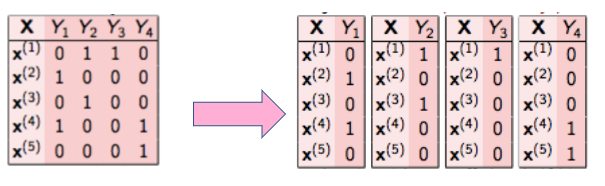

In [81]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\BinaryRelevance2.png",width=500, height=300)

In [82]:
#method for creating table with measures
def  showMeMeasuresDF(b_test,predictions,train_time,predict_time,method):
    df=pd.DataFrame()
    df['Measures']=(['Accuracy','Macro-Precision','Micro-Precision','Macro-Recall','Micro-Recall','Macro-F1','Micro-F1','0/1 loss','Hamming loss','Roc auc score','Train time','Test time','AMI'])
                    
    df[method]=([round(accuracy_score(b_test,predictions),3),round(precision_score(b_test,predictions,average='micro'),3)\
    ,round(precision_score(b_test,predictions,average='macro'),3)\
    ,round(recall_score(b_test,predictions,average='macro'),3)\
    ,round(recall_score(b_test,predictions,average='micro'),3)\
    ,round(f1_score(b_test,predictions,average='macro'),3)\
    ,round(f1_score(b_test,predictions,average='micro'),3)\
    ,round(zero_one_loss(b_test,predictions),3)\
    ,round(hamming_loss(b_test,predictions),3),\
    round(roc_auc_score(b_test,predictions,average='macro'),3),train_time,predict_time])
    
    print(df)

In [83]:
#Predict model-methods for Binary relevance(br), Classifier chains(cc), Label powerset(lp)
def predictModel(a_train, a_test, b_train, b_test,signal):
    if signal=='br':
        #classifier = BinaryRelevance(LogisticRegression())
       # classifier = BinaryRelevance(svm.SVC(probability=True))
        classifier = BinaryRelevance(svm.SVC(probability=False))

    if signal=='cc':
        #classifier = ClassifierChain(LogisticRegression())
        classifier = ClassifierChain(svm.SVC(probability=False))

    if signal=='lp':
        #classifier = LabelPowerset(LogisticRegression())
        classifier = LabelPowerset(svm.SVC(probability=False))
    t0=time.time()
    classifier.fit(a_train, b_train)
    train_time=round(time.time()-t0,3)
    t1=time.time()
    predictions = classifier.predict(a_test)
    predict_time=round(time.time()-t1, 3)
 #   probas=classifier.predict_proba(a_test)
#    showMeMeasuresDF(b_test,predictions.toarray(),predict_time,signal)
    showMeMeasuresPrettyTable(b_test,predictions.toarray(),train_time,predict_time)
    return predictions,train_time,predict_time

In [84]:
#method for creating table with measures
def  showMeMeasuresPrettyTable(y_test,predictions,train_time,predict_time):
    t = PrettyTable(['Measures', 'Value'])
    t.add_row(['Accuracy',round(accuracy_score(y_test,predictions),3)])
    t.add_row(['Macro-Precision',round(precision_score(y_test,predictions,average='macro'),3)])
    t.add_row(['Micro-Precision',round(precision_score(y_test,predictions,average='micro'),3)])
    t.add_row(['Macro-Recall',round(recall_score(y_test,predictions,average='macro'),3)])
    t.add_row(['Micro-Recall',round(recall_score(y_test,predictions,average='micro'),3)])
    t.add_row(['Macro-F1',round(f1_score(y_test,predictions,average='macro'),3)])
    t.add_row(['Micro-F1',round(f1_score(y_test,predictions,average='micro'),3)])
    t.add_row(['0/1 loss',round(zero_one_loss(y_test,predictions),3)])
    t.add_row(['Hamming loss',round(hamming_loss(y_test,predictions),3)])
    t.add_row(['Roc auc score',round(roc_auc_score(y_test,predictions, average='macro'),3)])
    t.add_row(['Train time',train_time])
    t.add_row(['Test time',predict_time])
    print (t)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [85]:
predictions_student,train_time_student,predict_time_student=predictModel(x_student_train, x_student_test, y_student_train, y_student_test,'br')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.487 |
| Macro-Precision | 0.779 |
| Micro-Precision | 0.784 |
|   Macro-Recall  | 0.972 |
|   Micro-Recall  | 0.975 |
|     Macro-F1    | 0.863 |
|     Micro-F1    | 0.869 |
|     0/1 loss    | 0.513 |
|   Hamming loss  | 0.222 |
|  Roc auc score  | 0.544 |
|    Train time   | 0.078 |
|    Test time    | 0.016 |
+-----------------+-------+


In [86]:
predictions_student.todense()[0:5]

matrix([[1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1]], dtype=int32)

## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [87]:
predictions_yeast,train_time_yeast,predict_time_yeast = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'br')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.011 |
| Macro-Precision | 0.243 |
| Micro-Precision | 0.755 |
|   Macro-Recall  | 0.146 |
|   Micro-Recall  | 0.356 |
|     Macro-F1    | 0.128 |
|     Micro-F1    | 0.484 |
|     0/1 loss    | 0.989 |
|   Hamming loss  | 0.232 |
|  Roc auc score  | 0.501 |
|    Train time   | 4.702 |
|    Test time    | 1.683 |
+-----------------+-------+


In [88]:
predictions_yeast.todense()

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [89]:
predictions_yeast.todense().shape

(726, 14)

In [90]:
#probas_yeast.todense()[1,:]

## Emotions dataset
#### TARGET LABELS ["amazed-suprised":"angry-aggresive"] 

In [91]:
predictions_emotions,train_time_emotions,predict_time_emotions = predictModel(x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test,'br')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.157 |
| Macro-Precision | 0.611 |
| Micro-Precision | 0.678 |
|   Macro-Recall  | 0.398 |
|   Micro-Recall  | 0.423 |
|     Macro-F1    |  0.46 |
|     Micro-F1    | 0.521 |
|     0/1 loss    | 0.843 |
|   Hamming loss  | 0.243 |
|  Roc auc score  | 0.652 |
|    Train time   | 0.156 |
|    Test time    | 0.053 |
+-----------------+-------+


In [92]:
predictions_emotions.todense()

matrix([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1]], dtype=int64)

In [93]:
predictions_emotions.todense().shape

(178, 6)

## Scene dataset
#### TARGET LABELS ["Beach":"Urban"] 

In [94]:
predictions_scene,train_time_scene,predict_time_scene= predictModel(x_scene_train, x_scene_test, y_scene_train, y_scene_test,'br')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    |  0.27 |
| Macro-Precision | 0.645 |
| Micro-Precision | 0.955 |
|   Macro-Recall  | 0.286 |
|   Micro-Recall  | 0.276 |
|     Macro-F1    | 0.362 |
|     Micro-F1    | 0.429 |
|     0/1 loss    |  0.73 |
|   Hamming loss  | 0.131 |
|  Roc auc score  | 0.641 |
|    Train time   |  3.5  |
|    Test time    | 1.288 |
+-----------------+-------+


In [95]:
predictions_scene.todense()

matrix([[0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64)

In [96]:
predictions_scene.todense().shape

(723, 6)

In [97]:
plt.style.use('ggplot')
%matplotlib inline

In [98]:
def MakeRocAucPlot( a_train, b_train,a_test,b_test):
    X = a_train
    y = b_train
    plt.figure(figsize=(18,8))


# Binarize the output
    y = label_binarize(y, classes=b_train.columns)
    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, b_train).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(b_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves


    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)


    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of '+b_train.columns[i]+' (area = {0:0.2f})'
                                   ''.format(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [99]:
# HM functions

In [100]:
def GetWantedClasses(a,df):
    proba=pd.DataFrame()
    for i in range(0,len(a)):
        proba[df.columns[a[i]]]=pd.Series(df[df.columns[a[i]]])
    return proba

In [101]:
def GetClassNames(a,df):
        classNames=[]
        for i in range(len(a)):
            classNames.append(df.columns[a[i]])
        return classNames

In [102]:
def All_ROC_AUC_Scores(a_train, b_train,a_test,b_test):
    X = a_train
    y = b_train
    y = label_binarize(y, classes=b_train.columns)
    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, b_train).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(b_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
   
    return fpr,tpr,roc_auc


In [103]:
def SelectNROC_AUC_Scores(n,operation,a_train, b_train,a_test,b_test):
   # Compute macro-average ROC curve and ROC area
    fpr,tpr,roc_auc=All_ROC_AUC_Scores(a_train, b_train,a_test,b_test)
    roc_aucs=pd.DataFrame()
   
    for k in roc_auc.keys():
        roc_aucs=roc_aucs.append(pd.concat([pd.Series(k),pd.Series(roc_auc[k])],axis=1))

    roc_aucs.rename_axis({0:''},inplace=True)

    if operation==0:
        return roc_aucs.nlargest(n,columns=1)
    if operation==1:
        return roc_aucs.nsmallest(n,columns=1)

In [104]:
def roc_auc_macro(fpr,tpr,n_classes):
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    roc_auc = dict()
# Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr["macro"],tpr["macro"],roc_auc["macro"]

In [105]:
def plotOnlyN(n,operation,a_train, b_train,a_test,b_test):
    df=SelectNROC_AUC_Scores(n,operation,a_train, b_train,a_test,b_test)
    X = a_train 
    
# Binarize the output
    
    y = label_binarize(GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_train),classes=pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel(),b_train)))

    n_classes = y.shape[1]
 
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=43))
    y_score = classifier.fit(a_train, GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_train)).decision_function(a_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(GetWantedClasses(pd.to_numeric(df[0]).ravel(),b_test).iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and ROC area

    fpr2,tpr2,roc_auc2=All_ROC_AUC_Scores(a_train, b_train,a_test,b_test)
    fpr["macro"],tpr["macro"],roc_auc["macro"]=roc_auc_macro(fpr2,tpr2,b_train.shape[1])

# Plot all ROC curves


    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)    
        
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of '+pd.Index(GetClassNames(pd.to_numeric(df[0]).ravel(),b_train))[i]+' (area = {0:0.2f})'
                                   ''.format(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    return plt.show()


### Student performance 

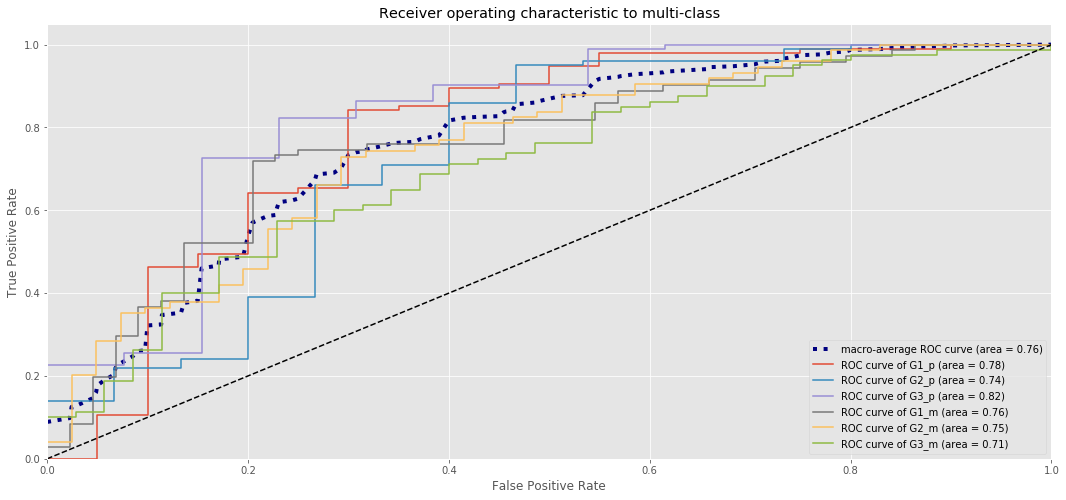

In [106]:
MakeRocAucPlot(x_student_train,y_student_train,x_student_test,y_student_test)

### Yeast

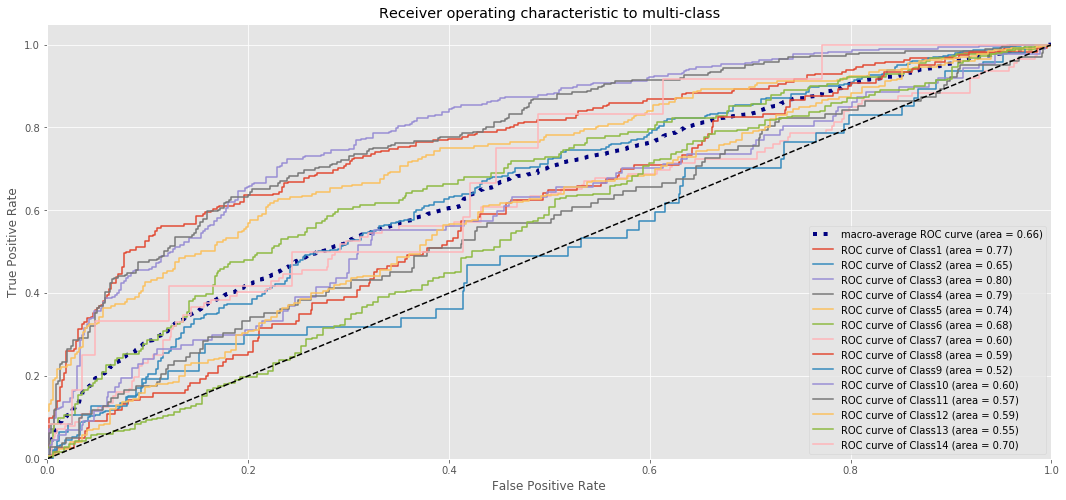

In [107]:
MakeRocAucPlot( x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test )

### YEAST -  TOP N ROC scores

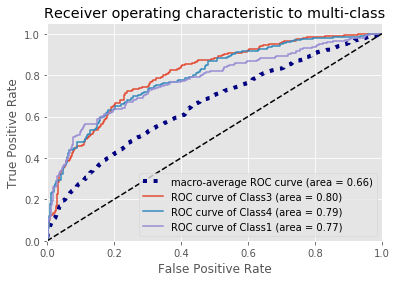

In [108]:
plotOnlyN(3,0,x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test)

### YEAST - WORST N ROC scores

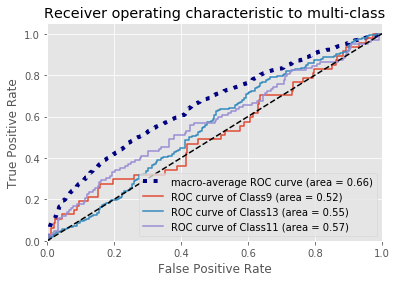

In [109]:
plotOnlyN(3,1,x_yeast_train, y_yeast_train,x_yeast_test,y_yeast_test)

### Emotions

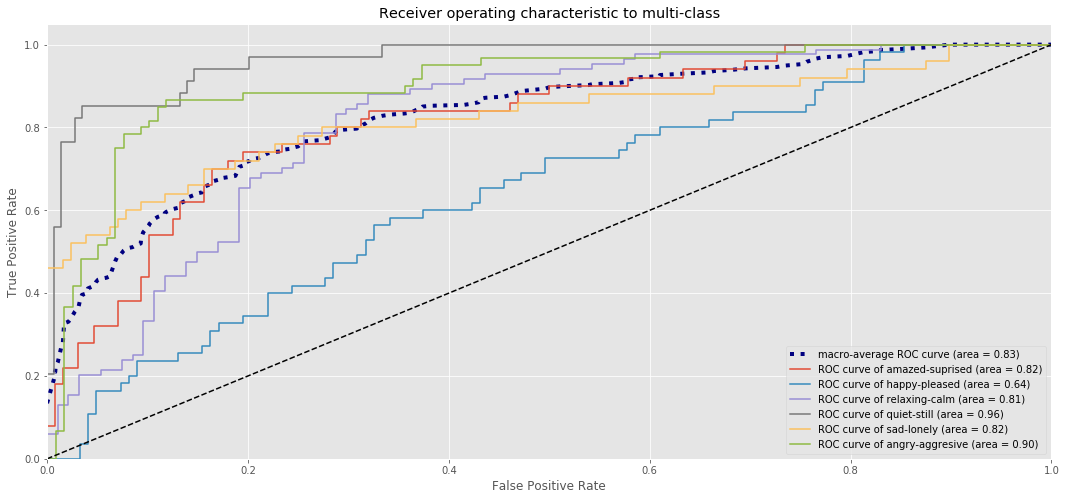

In [110]:
MakeRocAucPlot( x_emotions_train, y_emotions_train,x_emotions_test,y_emotions_test)

### Emotions - WORST N scores

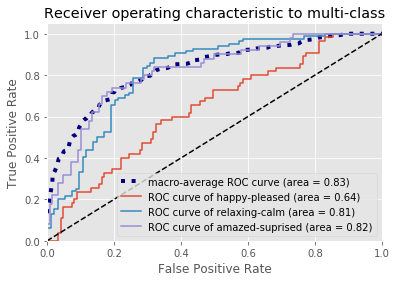

In [111]:
plotOnlyN(3,1,x_emotions_train, y_emotions_train,x_emotions_test,y_emotions_test)

### Scene

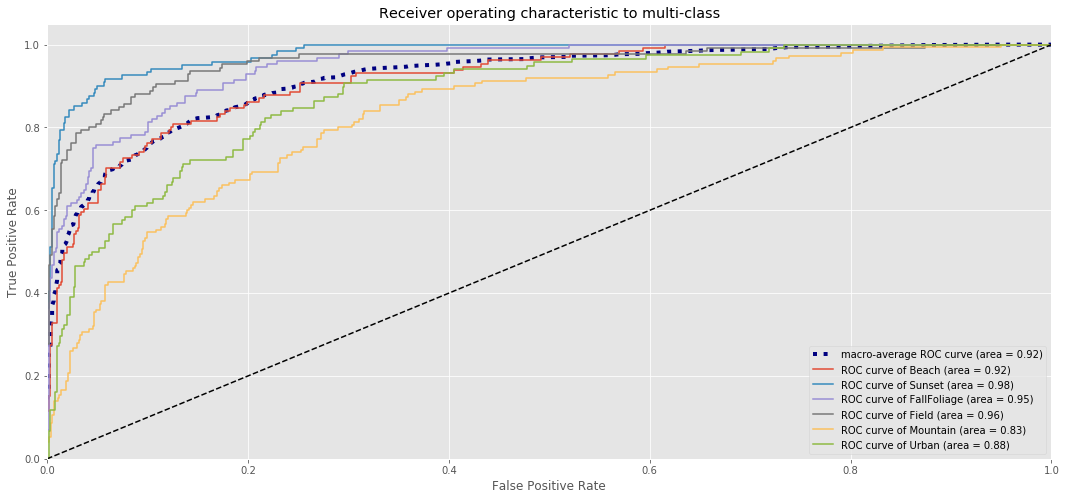

In [112]:
MakeRocAucPlot( x_scene_train, y_scene_train,x_scene_test,y_scene_test)

## b) Classifier Chains
 -The first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

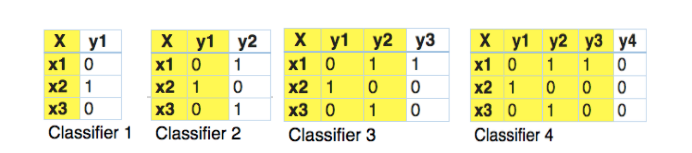

In [113]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\ClassifierChains.png",width=700, height=700)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [114]:
predictions_student_cc,train_time_student_cc,predict_time_student_cc = predictModel(x_student_train, x_student_test, y_student_train, y_student_test,'cc')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.496 |
| Macro-Precision | 0.782 |
| Micro-Precision | 0.787 |
|   Macro-Recall  | 0.972 |
|   Micro-Recall  | 0.975 |
|     Macro-F1    | 0.865 |
|     Micro-F1    | 0.871 |
|     0/1 loss    | 0.504 |
|   Hamming loss  | 0.219 |
|  Roc auc score  | 0.548 |
|    Train time   | 0.062 |
|    Test time    | 0.016 |
+-----------------+-------+


## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [115]:
predictions_yeast_cc,train_time_yeast_cc,predict_time_yeast_cc = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'cc')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.014 |
| Macro-Precision |  0.18 |
| Micro-Precision |  0.73 |
|   Macro-Recall  | 0.169 |
|   Micro-Recall  | 0.378 |
|     Macro-F1    | 0.161 |
|     Micro-F1    | 0.498 |
|     0/1 loss    | 0.986 |
|   Hamming loss  | 0.233 |
|  Roc auc score  | 0.508 |
|    Train time   | 4.405 |
|    Test time    | 1.518 |
+-----------------+-------+


## Emotions dataset

In [116]:
predictions_emotions_cc,train_time_emotions_cc,predict_time_emotions_cc = predictModel(x_emotions_train, x_emotions_test, y_emotions_train, y_emotions_test,'cc')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.157 |
| Macro-Precision | 0.611 |
| Micro-Precision | 0.678 |
|   Macro-Recall  | 0.405 |
|   Micro-Recall  | 0.429 |
|     Macro-F1    | 0.466 |
|     Micro-F1    | 0.526 |
|     0/1 loss    | 0.843 |
|   Hamming loss  | 0.242 |
|  Roc auc score  | 0.654 |
|    Train time   | 0.156 |
|    Test time    | 0.063 |
+-----------------+-------+


## Scene dataset

In [117]:
predictions_scene_cc,train_time_scene_cc,predict_time_scene_cc = predictModel(x_scene_train, x_scene_test, y_scene_train, y_scene_test,'cc')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.335 |
| Macro-Precision | 0.774 |
| Micro-Precision | 0.929 |
|   Macro-Recall  | 0.351 |
|   Micro-Recall  | 0.339 |
|     Macro-F1    | 0.442 |
|     Micro-F1    | 0.496 |
|     0/1 loss    | 0.665 |
|   Hamming loss  | 0.123 |
|  Roc auc score  | 0.673 |
|    Train time   | 3.469 |
|    Test time    | 1.342 |
+-----------------+-------+


## c) Label Powerset
It transforms the problem into a multi-class problem with one multi-class classifier which is trained on all unique label combinations found in the training data.
x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. Label powerset transforms this problem into a single multi-class problem as shown below.
Disadvantage:  The only disadvantage of this is that as the training data increases, number of classes also inreases, and measure values decrease.  

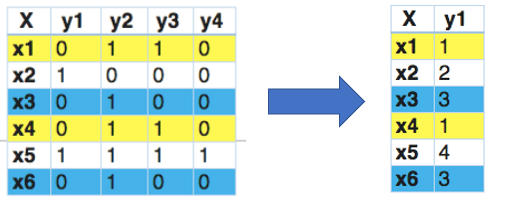

In [118]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\LabelPowerset2.png",width=500, height=300)

## Student performance dataset
#### TARGET LABELS [G1_p, G2_p, G3_p, G1_m, G2_m, G3_m]

In [119]:
predictions_student_lp,train_time_student_lp,predict_time_students_lp = predictModel(x_student_train, x_student_test, y_student_train, y_student_test,'lp')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.496 |
| Macro-Precision | 0.764 |
| Micro-Precision | 0.765 |
|   Macro-Recall  | 0.993 |
|   Micro-Recall  | 0.994 |
|     Macro-F1    |  0.86 |
|     Micro-F1    | 0.865 |
|     0/1 loss    | 0.504 |
|   Hamming loss  | 0.235 |
|  Roc auc score  | 0.515 |
|    Train time   | 0.047 |
|    Test time    | 0.016 |
+-----------------+-------+


## Yeast dataset
#### TARGET LABELS [Class1:Class14] 

In [120]:
predictions_yeast_lp,train_time_yeast_lp,predict_time_yeast_lp = predictModel(x_yeast_train, x_yeast_test, y_yeast_train, y_yeast_test,'lp')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.134 |
| Macro-Precision | 0.222 |
| Micro-Precision | 0.581 |
|   Macro-Recall  | 0.298 |
|   Micro-Recall  | 0.543 |
|     Macro-F1    | 0.226 |
|     Micro-F1    | 0.561 |
|     0/1 loss    | 0.866 |
|   Hamming loss  | 0.259 |
|  Roc auc score  | 0.509 |
|    Train time   | 1.727 |
|    Test time    | 0.923 |
+-----------------+-------+


## Emotions dataset

In [121]:
predictions_emotions_lp,train_time_emotions_lp,predict_time_emotions_lp = predictModel(x_emotions_train,x_emotions_test, y_emotions_train,y_emotions_test,'lp')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.309 |
| Macro-Precision | 0.554 |
| Micro-Precision | 0.581 |
|   Macro-Recall  | 0.586 |
|   Micro-Recall  | 0.613 |
|     Macro-F1    | 0.567 |
|     Micro-F1    | 0.596 |
|     0/1 loss    | 0.691 |
|   Hamming loss  | 0.258 |
|  Roc auc score  | 0.691 |
|    Train time   | 0.109 |
|    Test time    | 0.031 |
+-----------------+-------+


## Scene dataset

In [122]:
predictions_scene_lp,train_time_scene_lp,predict_time_scene_lp = predictModel(x_scene_train,x_scene_test, y_scene_train,y_scene_test,'lp')

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.705 |
| Macro-Precision | 0.773 |
| Micro-Precision | 0.765 |
|   Macro-Recall  | 0.719 |
|   Micro-Recall  | 0.714 |
|     Macro-F1    | 0.743 |
|     Micro-F1    | 0.739 |
|     0/1 loss    | 0.295 |
|   Hamming loss  |  0.09 |
|  Roc auc score  | 0.835 |
|    Train time   | 1.736 |
|    Test time    | 0.671 |
+-----------------+-------+


# 2. Algorithm adaptation methods

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

multi-label version of kNN is represented by MLkNN

In [123]:
# MLkNN
#Predict model-methods for MLkNN and Binary Relevance multi-label classifier based on k Nearest Neighbours method.
def predictModelAdapt(a_train, a_test, b_train,b_test,signal,k):
        if signal=='mlknn':
            classifier = MLkNN(k=k)
        if signal=='brknn':
            classifier = BRkNNaClassifier(k=k)
        t0=time.time()
        classifier.fit(csr_matrix(a_train.values), csr_matrix(b_train.values))
        train_time=round(time.time()-t0, 3)
        t1=time.time()
        predictions = classifier.predict(csr_matrix(a_test.values))
        predict_time=round(time.time()-t1, 3)
        showMeMeasuresPrettyTable(b_test,predictions.toarray(),train_time,predict_time)
        return predictions,train_time,predict_time

### STUDENT PERFORMANCE

In [124]:
predictions_student_MLkNN,train_time_student_mlknn,predict_time_student_mlknn=predictModelAdapt(x_student_train, x_student_test, y_student_train, y_student_test,'mlknn',20)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.443 |
| Macro-Precision | 0.773 |
| Micro-Precision | 0.777 |
|   Macro-Recall  | 0.975 |
|   Micro-Recall  | 0.979 |
|     Macro-F1    |  0.86 |
|     Micro-F1    | 0.866 |
|     0/1 loss    | 0.557 |
|   Hamming loss  | 0.229 |
|  Roc auc score  | 0.541 |
|    Train time   | 0.531 |
|    Test time    | 0.126 |
+-----------------+-------+


In [125]:
predictions_student_BRkNN=predictModelAdapt(x_student_train, x_student_test, y_student_train, y_student_test,'brknn',8)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    |  0.47 |
| Macro-Precision | 0.769 |
| Micro-Precision | 0.772 |
|   Macro-Recall  | 0.984 |
|   Micro-Recall  | 0.987 |
|     Macro-F1    | 0.861 |
|     Micro-F1    | 0.866 |
|     0/1 loss    |  0.53 |
|   Hamming loss  |  0.23 |
|  Roc auc score  | 0.525 |
|    Train time   |  0.0  |
|    Test time    | 0.094 |
+-----------------+-------+


### YEAST

In [126]:
predictions_yeast_MLkNN,train_time_yeast_mlknn,predict_time_yeast_mlknn=predictModelAdapt(x_yeast_train, x_yeast_test, y_yeast_train,y_yeast_test,'mlknn',20)   

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.176 |
| Macro-Precision |  0.56 |
| Micro-Precision | 0.717 |
|   Macro-Recall  | 0.367 |
|   Micro-Recall  | 0.591 |
|     Macro-F1    | 0.397 |
|     Micro-F1    | 0.647 |
|     0/1 loss    | 0.824 |
|   Hamming loss  | 0.197 |
|  Roc auc score  | 0.589 |
|    Train time   | 5.301 |
|    Test time    | 1.558 |
+-----------------+-------+


In [127]:
predictions_yeast_BRkNN=predictModelAdapt(x_yeast_train, x_yeast_test, y_yeast_train,y_yeast_test,'brknn',13)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.163 |
| Macro-Precision | 0.602 |
| Micro-Precision | 0.762 |
|   Macro-Recall  |  0.3  |
|   Micro-Recall  | 0.515 |
|     Macro-F1    | 0.348 |
|     Micro-F1    | 0.615 |
|     0/1 loss    | 0.837 |
|   Hamming loss  | 0.197 |
|  Roc auc score  | 0.575 |
|    Train time   | 0.016 |
|    Test time    | 1.139 |
+-----------------+-------+


### Emotions

In [128]:
predictions_emotions_MLkNN,train_time_emotions_mlknn,predict_time_emotions_mlknn=predictModelAdapt(x_emotions_train, x_emotions_test, y_emotions_train,y_emotions_test,'mlknn',20)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.135 |
| Macro-Precision | 0.577 |
| Micro-Precision | 0.639 |
|   Macro-Recall  | 0.403 |
|   Micro-Recall  | 0.435 |
|     Macro-F1    | 0.455 |
|     Micro-F1    | 0.518 |
|     0/1 loss    | 0.865 |
|   Hamming loss  | 0.253 |
|  Roc auc score  | 0.644 |
|    Train time   | 0.587 |
|    Test time    | 0.179 |
+-----------------+-------+


In [129]:
predictions_emotions_BRkNN=predictModelAdapt(x_emotions_train, x_emotions_test, y_emotions_train,y_emotions_test,'brknn',8)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.191 |
| Macro-Precision | 0.541 |
| Micro-Precision | 0.584 |
|   Macro-Recall  | 0.509 |
|   Micro-Recall  | 0.535 |
|     Macro-F1    | 0.513 |
|     Micro-F1    | 0.558 |
|     0/1 loss    | 0.809 |
|   Hamming loss  | 0.264 |
|  Roc auc score  | 0.665 |
|    Train time   |  0.0  |
|    Test time    | 0.156 |
+-----------------+-------+


### Scene

In [130]:
predictions_scene_MLkNN,train_time_scene_mlknn,predict_time_scene_mlknn=predictModelAdapt(x_scene_train, x_scene_test, y_scene_train,y_scene_test,'mlknn',20)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.633 |
| Macro-Precision | 0.769 |
| Micro-Precision | 0.771 |
|   Macro-Recall  | 0.696 |
|   Micro-Recall  |  0.69 |
|     Macro-F1    | 0.728 |
|     Micro-F1    | 0.728 |
|     0/1 loss    | 0.367 |
|   Hamming loss  | 0.092 |
|  Roc auc score  | 0.826 |
|    Train time   |  5.25 |
|    Test time    | 2.187 |
+-----------------+-------+


In [131]:
predictions_scene_BRkNN=predictModelAdapt(x_scene_train, x_scene_test, y_scene_train,y_scene_test,'brknn',8)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.645 |
| Macro-Precision | 0.789 |
| Micro-Precision | 0.756 |
|   Macro-Recall  | 0.702 |
|   Micro-Recall  | 0.694 |
|     Macro-F1    |  0.73 |
|     Micro-F1    | 0.724 |
|     0/1 loss    | 0.355 |
|   Hamming loss  | 0.095 |
|  Roc auc score  | 0.827 |
|    Train time   | 0.062 |
|    Test time    | 2.157 |
+-----------------+-------+


# 3. Ensemble Approaches
Ensemble always produces better results. Scikit-Multilearn library provides different ensembling classification functions, which you can use for obtaining better results.

In [132]:
# RakelD
def predictModelEnsemble(a_train, a_test, b_train,b_test,signal,k):
        if signal=='rakeld':
            classifier = RakelD(LabelPowerset(RandomForestClassifier()), k)
                        #classifier = RakelD(LabelPowerset(svm.SVC(probability=True)), k)
        t0=time.time()
        classifier.fit(a_train, b_train)
        train_time=round(time.time()-t0,3)
        t1=time.time()
        predictions = classifier.predict(csr_matrix(a_test.values))
        predict_time=round(time.time()-t1,3)
        showMeMeasuresPrettyTable(b_test,predictions.toarray(),train_time,predict_time)
        return predictions,train_time,predict_time

### Student

In [133]:
predictions_student_rakeld,train_time_student_rakel,predict_time_student_rakel=predictModelEnsemble(x_student_train, x_student_test, y_student_train, y_student_test,'rakeld',6)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.539 |
| Macro-Precision | 0.817 |
| Micro-Precision | 0.823 |
|   Macro-Recall  | 0.965 |
|   Micro-Recall  | 0.969 |
|     Macro-F1    | 0.883 |
|     Micro-F1    |  0.89 |
|     0/1 loss    | 0.461 |
|   Hamming loss  | 0.181 |
|  Roc auc score  |  0.66 |
|    Train time   | 0.031 |
|    Test time    | 0.016 |
+-----------------+-------+


### Yeast

In [134]:
predictions_yeast_rakeld,train_time_yeast_rakel,predict_time_yeast_rakel=predictModelEnsemble(x_yeast_train,x_yeast_test,y_yeast_train,y_yeast_test,'rakeld',14)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    |  0.19 |
| Macro-Precision | 0.449 |
| Micro-Precision | 0.618 |
|   Macro-Recall  | 0.382 |
|   Micro-Recall  | 0.575 |
|     Macro-F1    | 0.389 |
|     Micro-F1    | 0.596 |
|     0/1 loss    |  0.81 |
|   Hamming loss  | 0.238 |
|  Roc auc score  | 0.571 |
|    Train time   | 1.086 |
|    Test time    | 0.156 |
+-----------------+-------+


### Emotions

In [135]:
predictions_emotions_rakeld,train_time_emotions_rakel,predict_time_emotions_rakel=predictModelEnsemble(x_emotions_train,x_emotions_test,y_emotions_train,y_emotions_test,'rakeld',6)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.292 |
| Macro-Precision | 0.602 |
| Micro-Precision | 0.618 |
|   Macro-Recall  | 0.661 |
|   Micro-Recall  | 0.661 |
|     Macro-F1    | 0.627 |
|     Micro-F1    | 0.639 |
|     0/1 loss    | 0.708 |
|   Hamming loss  | 0.233 |
|  Roc auc score  | 0.736 |
|    Train time   | 0.062 |
|    Test time    | 0.031 |
+-----------------+-------+


### Scene

In [136]:
predictions_scene_rakeld,train_time_scene_rakel,predict_time_scene_rakel=predictModelEnsemble(x_scene_train,x_scene_test,y_scene_train,y_scene_test,'rakeld',6)

+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.675 |
| Macro-Precision | 0.735 |
| Micro-Precision | 0.731 |
|   Macro-Recall  | 0.695 |
|   Micro-Recall  | 0.687 |
|     Macro-F1    | 0.712 |
|     Micro-F1    | 0.708 |
|     0/1 loss    | 0.325 |
|   Hamming loss  | 0.101 |
|  Roc auc score  |  0.82 |
|    Train time   | 0.437 |
|    Test time    | 0.117 |
+-----------------+-------+


# Addition

### Nested stacking

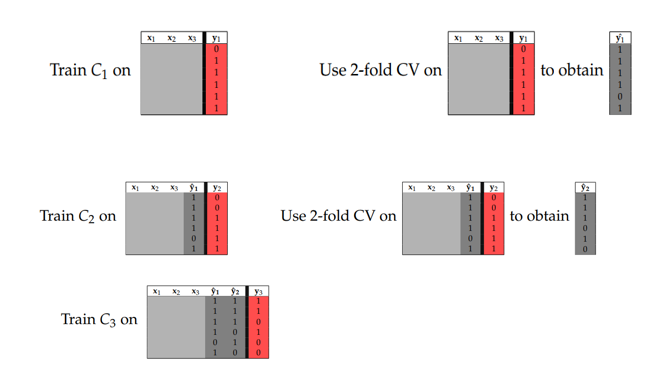

In [137]:
Image(filename="C:\\Users\\Dusica\\Desktop\\RESURSII ZA MLC\\NestedStacking.png",width=700, height=700)

In [138]:
def NestedStacking(x,y):
    labels=y.columns
    x1_ns=x
    for i in range(len(labels)):
        y1_ns=y[labels[i]]
        t1=time.time()
        predicted= cross_val_predict(LogisticRegression(), x1_ns,y1_ns, cv=2)
        pred_time=round(time.time()-t1,3)
        x1_ns['predicted'+labels[i]]=predicted
    showMeMeasuresPrettyTable(y1_ns, predicted,'/',pred_time)

In [139]:
all_a=[x_student,x_yeast,x_emotions,x_scene]
all_b=[y_student,y_yeast,y_emotions,y_scene]

In [140]:
for i in range(len(ListDFNames)):
    print (colored('\033[1m'+ListDFNames[i].upper(),'blue'))
    NestedStacking(all_a[i],all_b[i])

STUDENT
+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.675 |
| Macro-Precision | 0.621 |
| Micro-Precision | 0.675 |
|   Macro-Recall  | 0.601 |
|   Micro-Recall  | 0.675 |
|     Macro-F1    | 0.604 |
|     Micro-F1    | 0.675 |
|     0/1 loss    | 0.325 |
|   Hamming loss  | 0.325 |
|  Roc auc score  | 0.601 |
|    Train time   |   /   |
|    Test time    | 0.016 |
+-----------------+-------+
YEAST
+-----------------+-------+
|     Measures    | Value |
+-----------------+-------+
|     Accuracy    | 0.986 |
| Macro-Precision | 0.493 |
| Micro-Precision | 0.986 |
|   Macro-Recall  |  0.5  |
|   Micro-Recall  | 0.986 |
|     Macro-F1    | 0.496 |
|     Micro-F1    | 0.986 |
|     0/1 loss    | 0.014 |
|   Hamming loss  | 0.014 |
|  Roc auc score  |  0.5  |
|    Train time   |   /   |
|    Test time    | 0.078 |
+-----------------+-------+
EMOTIONS
+-----------------+-------+
|     Measures    | Value |
+-----------------+------

# RESULTS

In [141]:
def ShowHist(y,title):
    plt.figure(figsize=(20,8))
    plt.hist(y, 2, label=y.columns) #histtype='step'
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

In [142]:
def ShowCountOnlyForTargetLabels(y,title):
    plt.figure(figsize=(10,6))
    y2=[]
    col=y.columns
    for i in range(y.shape[1]):
        y2.append(y.iloc[:,i].value_counts()[1])
    
    plt.bar(range(len(y.columns)),y2,color=random.sample(colors.cnames.keys(), y.shape[1])) 
    x = np.array(range(0,len(y.columns)))
    my_xticks = y.columns
    plt.xticks(x, my_xticks)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

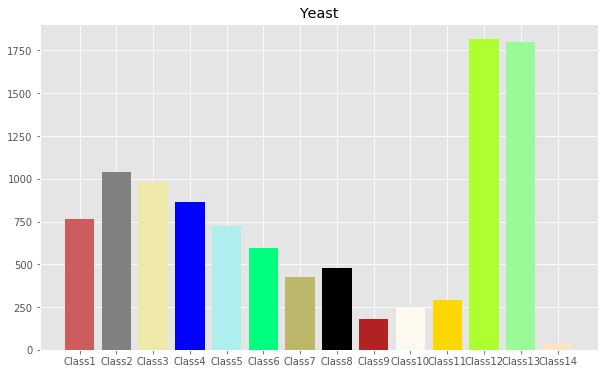

In [143]:
ShowCountOnlyForTargetLabels(y_yeast,'Yeast')

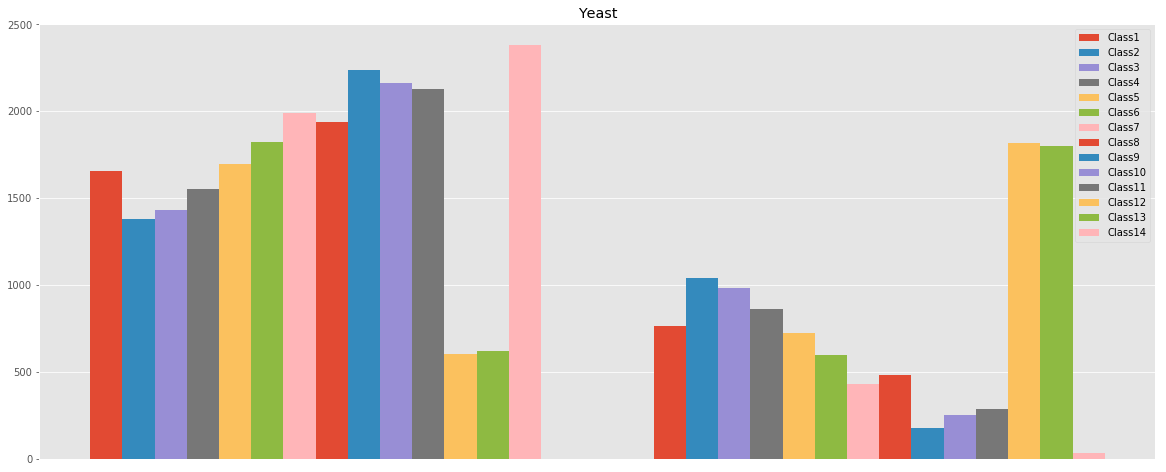

In [144]:
ShowHist(y_yeast,'Yeast')

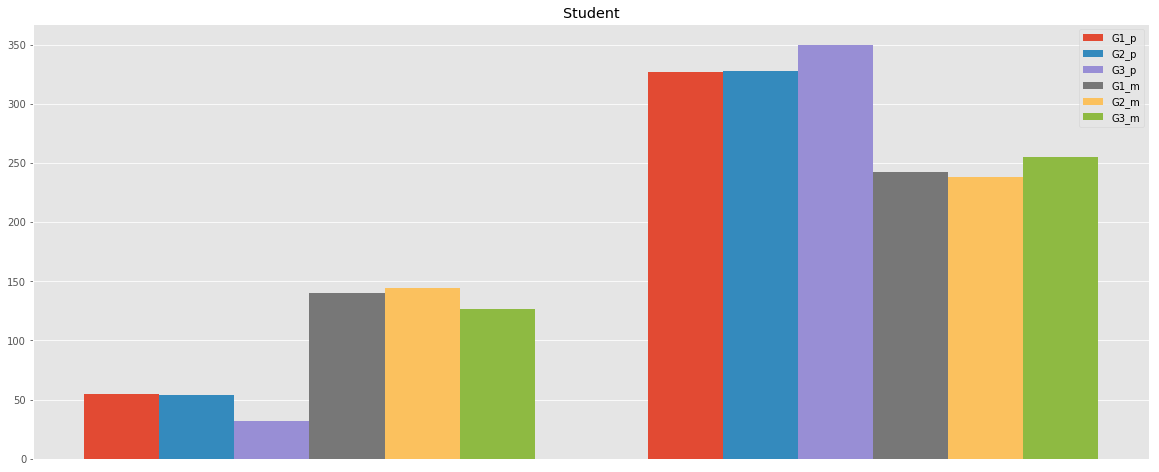

In [145]:
ShowHist(y_student,'Student')

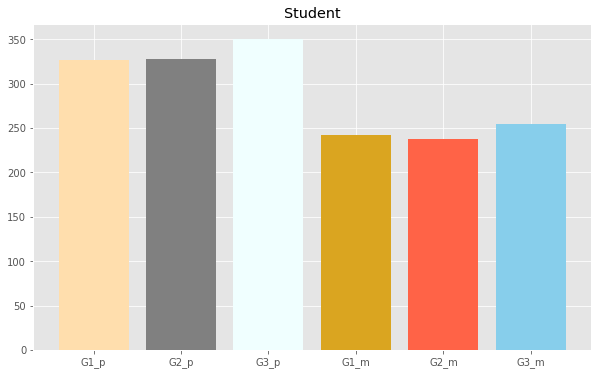

In [146]:
ShowCountOnlyForTargetLabels(y_student,'Student')

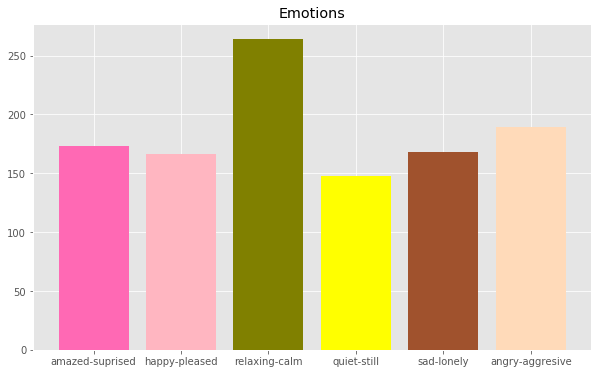

In [147]:
ShowCountOnlyForTargetLabels(y_emotions,'Emotions')

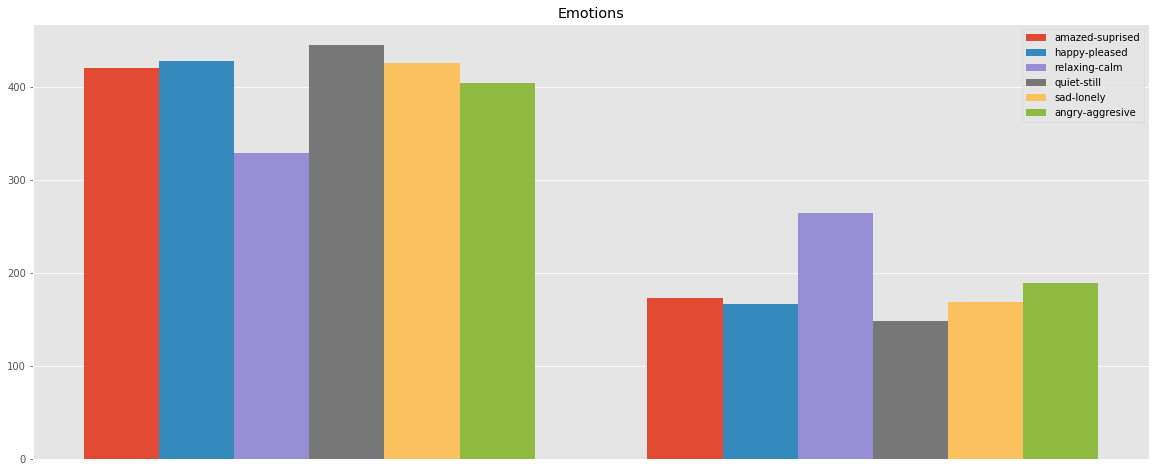

In [148]:
ShowHist(y_emotions,'Emotions')

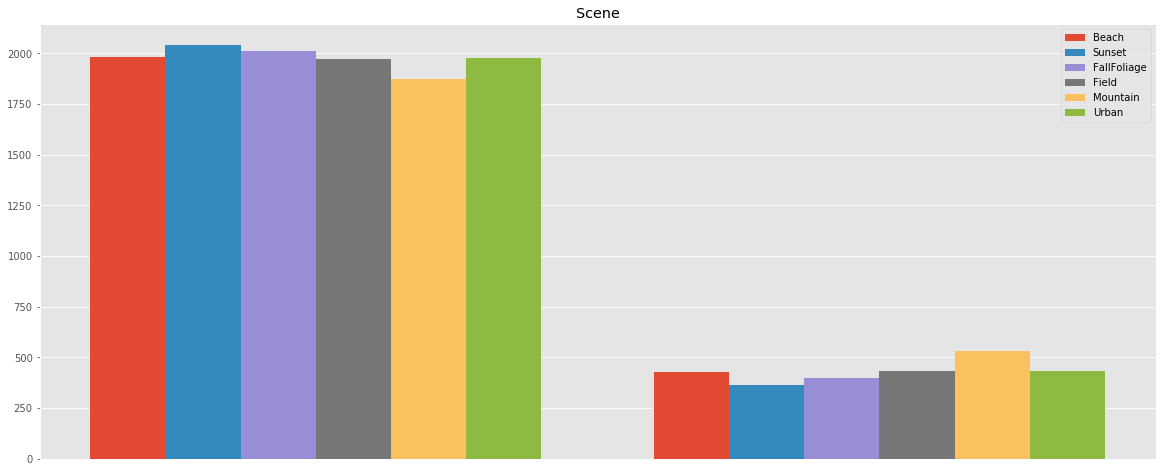

In [149]:
ShowHist(y_scene,'Scene')

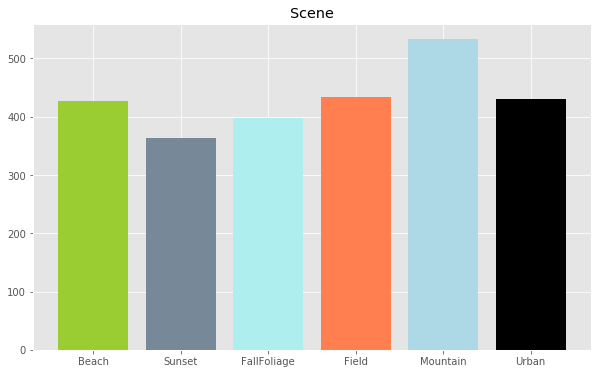

In [150]:
ShowCountOnlyForTargetLabels(y_scene,'Scene')

#### Shorter way -- through a method and for loop

In [151]:
all_a_train=[x_student_train,x_yeast_train,x_emotions_train,x_scene_train]
all_b_train=[y_student_train,y_yeast_train,y_emotions_train,y_scene_train]
all_a_test=[x_student_test,x_yeast_test,x_emotions_test,x_scene_test]
all_b_test=[y_student_test,y_yeast_test,y_emotions_test,y_scene_test]

In [152]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [153]:
def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min= s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

In [154]:
writer = pd.ExcelWriter('results_mlc.xlsx')

In [155]:
def getMeasuresTablesFinalResults2(classifiers,b_test,predictions,train_time,pred_time,df_name):
    df=pd.DataFrame()
    t = PrettyTable(['Measures'])
    df['Measures']=['Accuracy','Macro-Precision','Micro-Precision','Macro-Recall','Micro-Recall','Macro-F1','Micro-F1','0/1 loss','Hamming loss','Roc auc score','Train time','Test time']

    for i in range(len(classifiers)):
        
        df[classifiers[i].__class__.__name__]=([round(accuracy_score(b_test,predictions[i]),3),round(precision_score(b_test,predictions[i],average='micro'),3)\
        ,round(precision_score(b_test,predictions[i],average='macro'),3)\
        ,round(recall_score(b_test,predictions[i],average='macro'),3)\
        ,round(recall_score(b_test,predictions[i],average='micro'),3)\
        ,round(f1_score(b_test,predictions[i],average='macro'),3)\
        ,round(f1_score(b_test,predictions[i],average='micro'),3)\
        ,round(zero_one_loss(b_test,predictions[i]),3)\
        ,round(hamming_loss(b_test,predictions[i]),3)\
        ,round(roc_auc_score(b_test,predictions[i].todense(),average='macro'),3)\
        ,train_time[i],pred_time[i]])
        
    df=df.set_index(['Measures'])
    df=df.style.apply(highlight_max,axis=1)
    df.to_excel(writer,df_name)
    

    return df

In [156]:
#classifiers=[BinaryRelevance(LogisticRegression()),ClassifierChain(LogisticRegression()),LabelPowerset(LogisticRegression()),MLkNN(k=20),RakelD(LabelPowerset(RandomForestClassifier()), 14)]
classifiers=[BinaryRelevance(svm.SVC()),ClassifierChain(svm.SVC()),LabelPowerset(svm.SVC()),MLkNN(k=20),RakelD(LabelPowerset(svm.SVC()), 14)]

predictions_stud=[predictions_student,predictions_student_cc,predictions_student_lp,predictions_student_MLkNN,predictions_student_rakeld]
predictions_yeast_all=[predictions_yeast,predictions_yeast_cc,predictions_yeast_lp,predictions_yeast_MLkNN,predictions_yeast_rakeld]
predictions_emo=[predictions_emotions,predictions_emotions_cc,predictions_emotions_lp,predictions_emotions_MLkNN,predictions_emotions_rakeld]
predictions_scene_all=[predictions_scene,predictions_scene_cc,predictions_scene_lp,predictions_scene_MLkNN,predictions_scene_rakeld]

time_stu=[predict_time_student,predict_time_student_cc,predict_time_students_lp,predict_time_student_mlknn,predict_time_student_rakel]
time_ye=[predict_time_yeast,predict_time_yeast_cc,predict_time_yeast_lp,predict_time_yeast_mlknn,predict_time_yeast_rakel]
time_emo=[predict_time_emotions,predict_time_emotions_cc,predict_time_emotions_lp,predict_time_emotions_mlknn,predict_time_emotions_rakel]
time_scene=[predict_time_scene,predict_time_scene_cc,predict_time_scene_lp,predict_time_scene_mlknn,predict_time_scene_rakel]

t_time_stu=[train_time_student,train_time_student_cc,train_time_student_lp,train_time_student_mlknn,train_time_student_rakel]
t_time_ye=[train_time_yeast,train_time_yeast_cc,train_time_yeast_lp,train_time_yeast_mlknn,train_time_yeast_rakel]
t_time_emo=[train_time_emotions,train_time_emotions_cc,train_time_emotions_lp,train_time_emotions_mlknn,train_time_emotions_rakel]
t_time_scene=[train_time_scene,train_time_scene_cc,train_time_scene_lp,train_time_scene_mlknn,train_time_scene_rakel]



In [157]:
print('Student performance\n')                   
getMeasuresTablesFinalResults2(classifiers,y_student_test,predictions_stud,t_time_stu,time_stu,'Student')

Student performance



,BinaryRelevance,ClassifierChain,LabelPowerset,MLkNN,RakelD
Measures,,,,,
Accuracy,0.487,0.496,0.496,0.443,0.539
Macro-Precision,0.784,0.787,0.765,0.777,0.823
Micro-Precision,0.779,0.782,0.764,0.773,0.817
Macro-Recall,0.972,0.972,0.993,0.975,0.965
Micro-Recall,0.975,0.975,0.994,0.979,0.969
Macro-F1,0.863,0.865,0.86,0.86,0.883
Micro-F1,0.869,0.871,0.865,0.866,0.89
0/1 loss,0.513,0.504,0.504,0.557,0.461
Hamming loss,0.222,0.219,0.235,0.229,0.181


In [158]:
print('\nYeast\n')                   
getMeasuresTablesFinalResults2(classifiers,y_yeast_test,predictions_yeast_all,t_time_ye,time_ye,'Yeast')


Yeast



,BinaryRelevance,ClassifierChain,LabelPowerset,MLkNN,RakelD
Measures,,,,,
Accuracy,0.011,0.014,0.134,0.176,0.19
Macro-Precision,0.755,0.73,0.581,0.717,0.618
Micro-Precision,0.243,0.18,0.222,0.56,0.449
Macro-Recall,0.146,0.169,0.298,0.367,0.382
Micro-Recall,0.356,0.378,0.543,0.591,0.575
Macro-F1,0.128,0.161,0.226,0.397,0.389
Micro-F1,0.484,0.498,0.561,0.647,0.596
0/1 loss,0.989,0.986,0.866,0.824,0.81
Hamming loss,0.232,0.233,0.259,0.197,0.238


In [159]:
print('\nEmotions\n')                   
getMeasuresTablesFinalResults2(classifiers,y_emotions_test,predictions_emo,t_time_emo,time_emo,'Emotions')


Emotions



,BinaryRelevance,ClassifierChain,LabelPowerset,MLkNN,RakelD
Measures,,,,,
Accuracy,0.157,0.157,0.309,0.135,0.292
Macro-Precision,0.678,0.678,0.581,0.639,0.618
Micro-Precision,0.611,0.611,0.554,0.577,0.602
Macro-Recall,0.398,0.405,0.586,0.403,0.661
Micro-Recall,0.423,0.429,0.613,0.435,0.661
Macro-F1,0.46,0.466,0.567,0.455,0.627
Micro-F1,0.521,0.526,0.596,0.518,0.639
0/1 loss,0.843,0.843,0.691,0.865,0.708
Hamming loss,0.243,0.242,0.258,0.253,0.233


In [160]:
print('\nScene\n')                   
getMeasuresTablesFinalResults2(classifiers,y_scene_test,predictions_scene_all,t_time_scene,time_scene,'Scene')


Scene



,BinaryRelevance,ClassifierChain,LabelPowerset,MLkNN,RakelD
Measures,,,,,
Accuracy,0.27,0.335,0.705,0.633,0.675
Macro-Precision,0.955,0.929,0.765,0.771,0.731
Micro-Precision,0.645,0.774,0.773,0.769,0.735
Macro-Recall,0.286,0.351,0.719,0.696,0.695
Micro-Recall,0.276,0.339,0.714,0.69,0.687
Macro-F1,0.362,0.442,0.743,0.728,0.712
Micro-F1,0.429,0.496,0.739,0.728,0.708
0/1 loss,0.73,0.665,0.295,0.367,0.325
Hamming loss,0.131,0.123,0.09,0.092,0.101


In [161]:
#save DataFrame results as .xcl file with different sheets

In [163]:
writer.save()

## Results for all datasets
### Shorther way with a train/test split 
### ALL in one method 

In [164]:
#method that returns a table with evaluation measures of trained model with differently used methods(classifiers)
def getMeasuresTablesFinalResults(classifiers,x,y):
    t = PrettyTable(['Measures'])
    t.add_row(['Accuracy'])
    t.add_row(['Macro-Precision'])
    t.add_row(['Micro-Precision'])
    t.add_row(['Macro-Recall'])
    t.add_row(['Micro-Recall'])
    t.add_row(['Macro-F1'])
    t.add_row(['Micro-F1'])
    t.add_row(['0/1 loss'])
    t.add_row(['Hamming loss'])
    t.add_row(['Roc auc score'])
    t.add_row(['Train time'])
    t.add_row(['Test time'])


    for i in range(len(classifiers)):

        a_train, a_test, b_train, b_test = train_test_split(x,y, test_size=0.3, random_state=42)
        classifier = classifiers[i]
        if classifiers[i].__class__.__name__=='MLkNN':
            classifier.fit(csr_matrix(a_train.values), csr_matrix(b_train.values))
            predictions = classifier.predict(csr_matrix(a_test.values))
        else:
            t0=time.time()
            classifier.fit(a_train, b_train)
            train_time=round(time.time()-t0, 3)
            t1=time.time()
            predictions = classifier.predict(a_test)
            predict_time=round(time.time()-t1, 3)
        t.add_column(classifiers[i].__class__.__name__,[round(accuracy_score(b_test,predictions),3),\
        round(precision_score(b_test,predictions,average='macro'),3),round(precision_score(b_test,predictions,average='micro'),3)\
        ,round(recall_score(b_test,predictions,average='macro'),3)\
        ,round(recall_score(b_test,predictions,average='micro'),3)\
        ,round(f1_score(b_test,predictions,average='macro'),3)\
        ,round(f1_score(b_test,predictions,average='micro'),3)\
        ,round(zero_one_loss(b_test,predictions),3)\
        ,round(hamming_loss(b_test,predictions),3)\
        ,round(roc_auc_score(b_test,predictions.todense(),average='macro'),3)\
        ,train_time,predict_time])

    print(t) 

In [165]:
#classifiers=[BinaryRelevance(LogisticRegression()),ClassifierChain(LogisticRegression()),LabelPowerset(LogisticRegression()),MLkNN(k=20),RakelD(LabelPowerset(RandomForestClassifier()), 14)]
classifiers=[BinaryRelevance(svm.SVC()),ClassifierChain(svm.SVC()),LabelPowerset(svm.SVC()),MLkNN(k=20),RakelD(LabelPowerset(svm.SVC()), 14)]
#classifiers=[BinaryRelevance(svm.SVC(probability=True)),ClassifierChain(svm.SVC(probability=True)),LabelPowerset(svm.SVC(probability=True)),MLkNN(k=20),RakelD(LabelPowerset(svm.SVC(probability=True)), 14)]


print('Student performance\n')                    
getMeasuresTablesFinalResults(classifiers,x_student,y_student)
print('\nYeast\n')   
getMeasuresTablesFinalResults(classifiers,x_yeast,y_yeast)
print('\nEmotions\n')                    
getMeasuresTablesFinalResults(classifiers,x_emotions,y_emotions)
print('\nScene\n')
getMeasuresTablesFinalResults(classifiers,x_scene,y_scene)

Student performance

+-----------------+-----------------+-----------------+---------------+-------+--------+
|     Measures    | BinaryRelevance | ClassifierChain | LabelPowerset | MLkNN | RakelD |
+-----------------+-----------------+-----------------+---------------+-------+--------+
|     Accuracy    |      0.487      |      0.496      |     0.496     | 0.452 | 0.496  |
| Macro-Precision |       0.78      |      0.783      |     0.764     | 0.772 | 0.764  |
| Micro-Precision |      0.785      |      0.788      |     0.765     | 0.775 | 0.765  |
|   Macro-Recall  |      0.972      |      0.972      |     0.993     | 0.982 | 0.993  |
|   Micro-Recall  |      0.975      |      0.975      |     0.994     | 0.985 | 0.994  |
|     Macro-F1    |      0.864      |      0.866      |      0.86     | 0.862 |  0.86  |
|     Micro-F1    |       0.87      |      0.872      |     0.865     | 0.868 | 0.865  |
|     0/1 loss    |      0.513      |      0.504      |     0.504     | 0.548 | 0.504  |




## -------- TO BE CONTINUED --------

### Multi label classification
##### 1. Problem transformation ---> skmultilearn.problem_transformation
##### 2. Algorithm adaptation --->  skmultilearn.adapt
##### 3. Ensemble classification --->  skmultilearn.ensemble

##### MEKA  //NE?

from skmultilearn.ext import Meka
meka = Meka(
    meka_classifier = "meka.classifiers.multilabel.CC",\
    weka_classifier = "weka.classifiers.bayes.NaiveBayes",\
    meka_classpath = "C:/Users/Dusica/desktop/jupy/meka1.9/lib/",\
    java_command='java')
meka.clean()
meka.error

meka.java_command='java'
meka.meka_classifier = "meka.classifiers.multilabel.CC"
meka.meka_classpath = "C:/Users/Dusica/desktop/jupy/meka1.9/lib/"
meka.weka_classifier = "weka.classifiers.bayes.NaiveBayes"
meka.run(scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast-train.arff'), scipy.io.arff.loadarff('/Users/Dusica/Downloads/yeast/yeast-test.arff'))
meka.error

from skmultilearn.ext import Meka

 
meka = Meka(
    meka_classifier = "meka.classifiers.multilabel.LC",\
    weka_classifier = "weka.classifiers.bayes.NaiveBayes",\
    meka_classpath = "C:/Users/Dusica/desktop/jupy/meka1.9/lib/",\
    java_command='java')
meka.fit(x_emotions_train, y_emotions_train)